In [1]:
import pandas as pd

In [2]:
import nltk


In [19]:
# import chardet

# with open('spam.csv', 'rb') as f:
#     result = chardet.detect(f.read())
# print(result['encoding'])

df = pd.read_csv('spam.csv', encoding='Windows-1252')

# 1. Data Cleaning

In [20]:
df = df[['v1','v2']]
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])  ## ('ham',0) , ('spam',1)

df.drop_duplicates(inplace=True)

# 2.EDA

In [21]:

df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

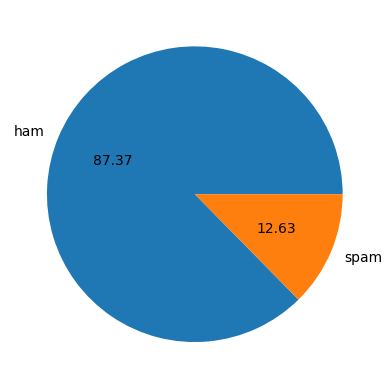

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==0]['num_sentences'].value_counts()

num_sentences
1     2479
2     1170
3      484
4      202
5       93
6       45
7       21
11       4
8        4
10       4
9        4
12       2
14       1
38       1
18       1
13       1
Name: count, dtype: int64

In [29]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

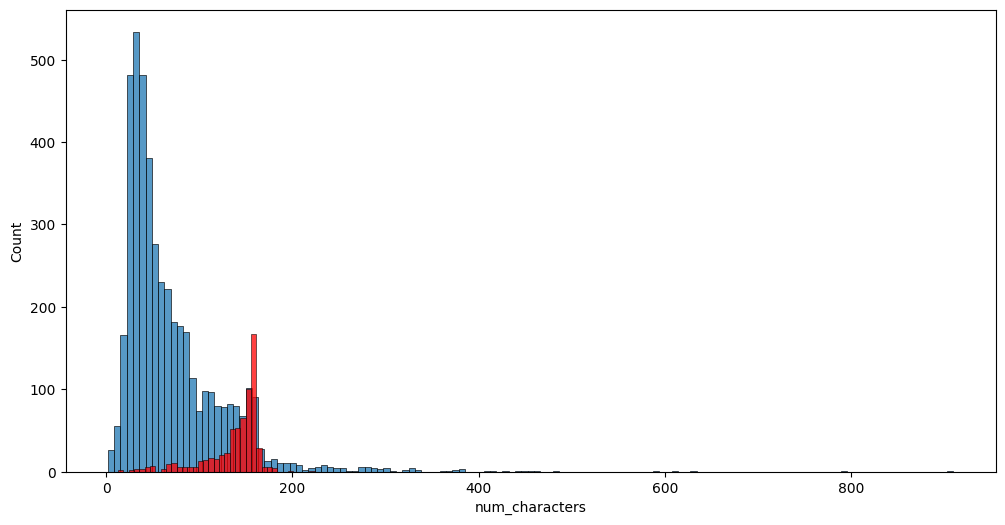

In [30]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

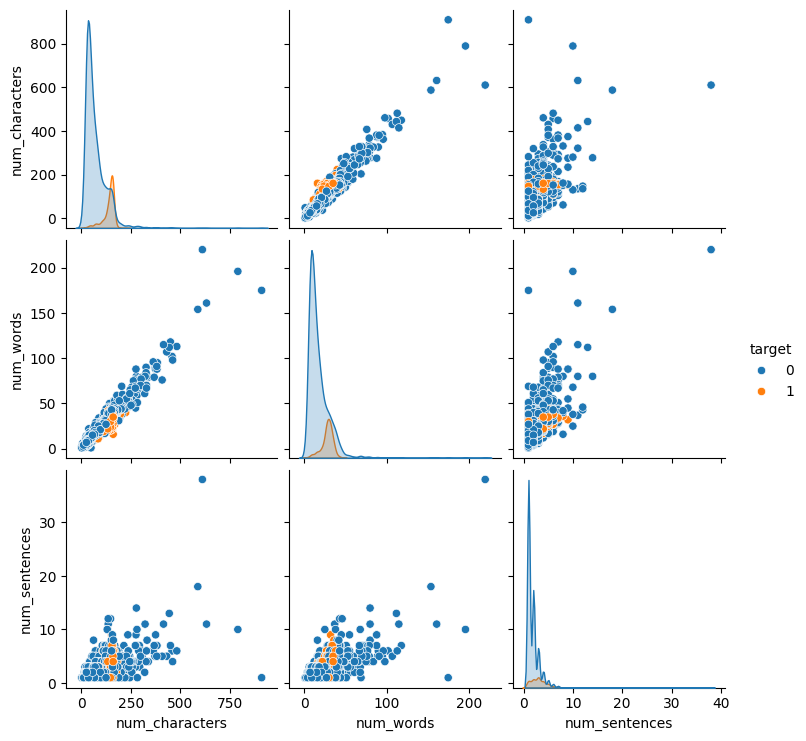

In [31]:
sns.pairplot(df,hue='target')

# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [60]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer




True

In [114]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def transform_test(text: str):
    """
        Preprocesses the input text by:
        1. Converting to lowercase
        2. Tokenizing
        3. Removing special characters, punctuation, and stopwords
        4. Applying stemming

        Returns:
            str: Transformed text.
            
        if error:
            import nltk
            nltk.download('punkt')
            nltk.download('stopwords')
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)

    # Lowercase and tokenize
    tokens = word_tokenize(text.lower())

    # Remove special characters, punctuation, and stopwords; apply stemming
    processed_tokens = [
        stemmer.stem(i)
        for i in tokens
        if i.isalnum() and i not in stop_words and i not in punctuation_set
    ]

    return " ".join(processed_tokens)

In [115]:
transform_test("Try a detecting the encoding. automatically using the chardet library %% !\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~")

'tri detect encod automat use chardet librari'

In [82]:
df['transformed_test'] = df['text'].apply(transform_test)

In [84]:
from wordcloud import WordCloud

In [95]:
wc = WordCloud(background_color='white')

In [102]:
spam = wc.generate(df[df['target'] == 1]['transformed_test'].str.cat(sep=''))

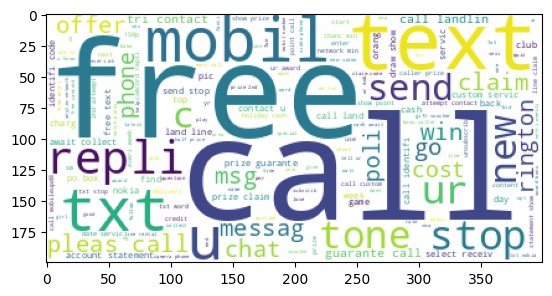

In [103]:
plt.imshow(spam)

In [104]:
ham = wc.generate(df[df['target'] == 0]['transformed_test'].str.cat(sep=''))

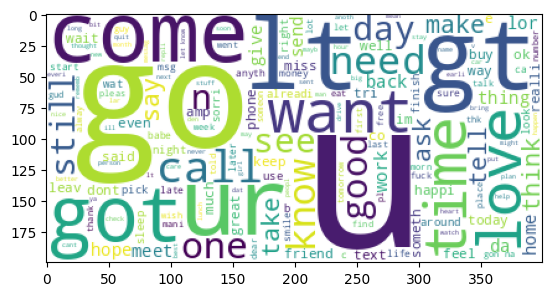

In [105]:
plt.imshow(ham)

In [109]:
spam_words_list = df[df['target'] == 1]['transformed_test'].str.cat().split()

In [110]:
from collections import Counter

In [112]:
Counter(spam_words_list).most_common(30)

[('call', 305),
 ('free', 159),
 ('2', 154),
 ('txt', 137),
 ('text', 118),
 ('mobil', 106),
 ('u', 99),
 ('repli', 99),
 ('ur', 99),
 ('claim', 96),
 ('4', 96),
 ('stop', 90),
 ('prize', 78),
 ('get', 65),
 ('tone', 61),
 ('servic', 60),
 ('new', 58),
 ('send', 57),
 ('nokia', 55),
 ('contact', 53),
 ('award', 52),
 ('phone', 52),
 ('cash', 48),
 ('week', 47),
 ('pleas', 44),
 ('collect', 43),
 ('win', 41),
 ('min', 41),
 ('c', 38),
 ('messag', 37)]